# Практика

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
%matplotlib inline
import statsmodels.stats.weightstats as ssw

## ЦПТ для различных распределений
Возьмите то непрерывное распределение, которое вам больше всего понравится из списка доступных в модуле [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html).

### Сгенерируйте примеры из распределения

In [2]:
# ваш код тут
df = 1
chi_rv = sts.chi(df)
sample = chi_rv.rvs(100)
sample

array([1.94858967, 0.09480023, 0.98688127, 0.91318403, 1.92328462,
       0.32007889, 1.08553794, 0.23091679, 1.74818514, 0.69013089,
       0.56566742, 0.08629605, 0.07452538, 0.16917739, 0.37027301,
       0.04291431, 0.90086041, 0.43924402, 1.02095122, 0.30572424,
       1.27808781, 1.64276736, 2.16445433, 1.4625044 , 0.90116974,
       0.3327318 , 0.92984343, 0.97225381, 0.07248449, 0.92158319,
       0.17271174, 0.4561211 , 0.35448527, 0.01126705, 1.44499175,
       0.92473623, 0.25631419, 0.00884399, 0.00677995, 0.86094727,
       0.29137315, 1.31401009, 1.40602522, 0.31611969, 1.60393948,
       0.12368904, 0.41200782, 1.08834063, 1.0480721 , 0.29097613,
       0.40623933, 1.81681163, 0.44900858, 1.97532625, 1.18999403,
       0.54015087, 0.28655094, 0.84029434, 1.7165611 , 0.98002455,
       0.34856325, 0.8683996 , 1.09519617, 0.15138563, 2.13022303,
       0.842495  , 0.23241425, 1.59458787, 0.22775613, 0.66773028,
       0.05236076, 0.50770622, 0.3915336 , 0.20084655, 1.93384

In [3]:
sample.dtype

dtype('float64')

In [4]:
real_mean = chi_rv.mean() # настоящее среднее случайной величины
real_mean

0.7978845608028655

In [5]:
real_var = chi_rv.var() # настоящая дисперсия случайной величины
real_var

0.3633802276324184

### Постройте гистограмму выборки и теоретическую плотность распределения

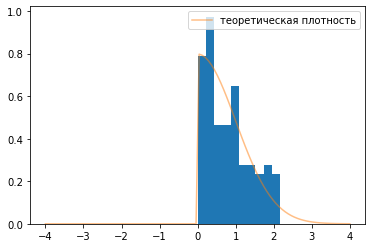

In [6]:
plt.hist(sample, density=True)
x = np.linspace(-4,4,100)
pdf = chi_rv.pdf(x)
plt.plot(x, pdf, label='теоретическая плотность', alpha=0.5)
plt.legend()

In [7]:
sample_mean = sample.mean() # выборочное среднее
print(sample_mean)
sample_var = sample.var() # выборочная дисперсия
print(sample_var)

0.8045682123965253
0.3720072328920738


### Оценим распределение выборочного среднего для разных объёмов выборок
Для этого постройте на одном полотне гистограмму выборочных средних и теоретическое распределение выборочных средних по ЦПТ для разных объёмов выборок.

Для теоретического распределение используйте настоящие значения мат ожидания и дисперсии (не приближенные на основе выборки).

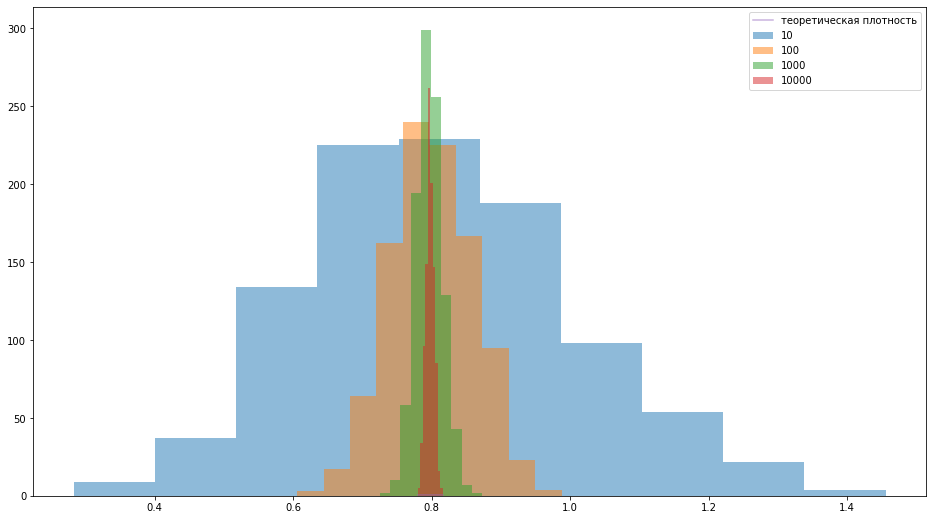

In [50]:
plt.figure(figsize=(16,9))
# сгенерируем много выборочных средних
for N in [10, 100, 1000, 10000]:
    means = []
    for i in range(1000):
         means.append(np.mean(chi_rv.rvs(N)))
    plt.hist(means, alpha=0.5)
    
x = np.linspace(min(means), max(means), 100)
pdf = chi_rv.pdf(x)
plt.plot(x, pdf, alpha=0.5)
plt.legend(['теоретическая плотность', '10', '100', '1000', '10000'])
plt.show()

Как вы считаете, для выбранного распределения апроксимация распределения выборочного среднего работает хорошо или плохо?
**Ваш ответ:**

Если говорить про Центральную предельную теорему, в которой говорится, что сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы, имеет распределение, близкое к нормальному, то тут все хорошо - распределения близки к нормальным

## Доверительный интервал на основе ЦПТ
Возьмите данные для оттока телеком компании, и постройте доверительные интервалы для среднего значения total day calls, используя центральную предельную теорему в разбиении по колонке churn (ушел/не ушел). 

Для оценки дисперсии используйте несмещенную оценку (параметр ddof=1).

Сделайте оценку с использованием явной формулы для z интервала, а затем с помощью функций 
`from statsmodels.stats.weightstats import _zconfint_generic`. Сравните результаты.


Ссылка на данные: https://drive.google.com/file/d/1X_drKqoarnU2Sz2har7uSCsgyhh8Xtz8/view?usp=sharing

In [43]:
# либо загружаем из альтернативного хранилища
url = "https://raw.githubusercontent.com/piton1/DS/Lesson_5/telecom_churn.csv"
df = pd.read_csv(url)
display(df)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [44]:
not_churn = []
churn = []
for index, row in df.iterrows():
    if row['churn']:
        churn.append(row['total day calls'])
    else:
        not_churn.append(row['total day calls'])
df_churn = pd.DataFrame({'total day calls': churn})
df_not_churn = pd.DataFrame({'total day calls': not_churn})

(array([  1.,   0.,   7.,  17.,  59., 118., 154.,  94.,  29.,   4.]),
 array([  0. ,  16.5,  33. ,  49.5,  66. ,  82.5,  99. , 115.5, 132. ,
        148.5, 165. ]),
 <BarContainer object of 10 artists>)

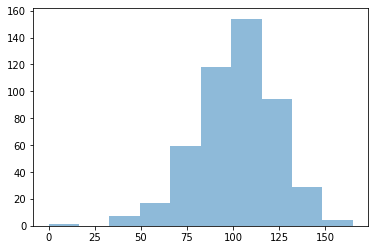

In [71]:
plt.hist(df_churn['total day calls'], alpha=0.5)

(array([  1.,   1.,  10., 101., 378., 772., 916., 492., 154.,  25.]),
 array([  0. ,  16.3,  32.6,  48.9,  65.2,  81.5,  97.8, 114.1, 130.4,
        146.7, 163. ]),
 <BarContainer object of 10 artists>)

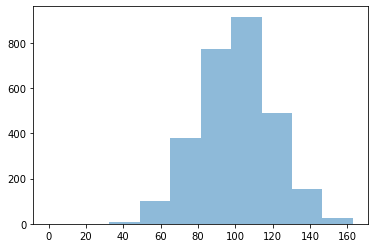

In [69]:
plt.hist(df_not_churn['total day calls'], alpha=0.5)

In [56]:
# дисперсия для ушедших
churn_var = df_churn['total day calls'].var()
churn_var

465.79598463957115

In [57]:
# дисперсия для оставшихся
not_churn_var = df_not_churn['total day calls'].var()
not_churn_var

392.08581663003537

In [77]:
df_churn['total day calls'].dtype

dtype('int64')

In [79]:
print("Для ушедших доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(df_churn['total day calls']) - 1.96 * df_churn['total day calls'].std() / np.sqrt(N-1), np.mean(df_churn['total day calls']) + 1.96 * df_churn['total day calls'].std() / np.sqrt(N-1) 
))
print("Для оставшихся доверительный интервал для среднего по цпт, если нам известна дисперсия: [{}, {}] ".format(
    np.mean(df_not_churn['total day calls']) - 1.96 * df_not_churn['total day calls'].std() / np.sqrt(N-1), np.mean(df_not_churn['total day calls']) + 1.96 * df_not_churn['total day calls'].std() / np.sqrt(N-1) 
))

Для ушедших доверительный интервал для среднего по цпт, если нам известна дисперсия: [99.40863130099713, 103.26217615241903] 
Для оставшихся доверительный интервал для среднего по цпт, если нам известна дисперсия: [98.51539864475272, 102.05091714472097] 


In [76]:

print("Для ушедших доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(df_churn['total day calls']),  np.std(df_churn['total day calls'], ddof=1), alpha=0.95, alternative='two-sided')
))
print("Для оставшихся доверительный интервал для среднего по цпт методом _zconfint_generic: {} ".format(
    ssw._zconfint_generic(np.mean(df_not_churn['total day calls']),  np.std(df_not_churn['total day calls'], ddof=1), alpha=0.95, alternative='two-sided')
))

Для ушедших доверительный интервал для среднего по цпт методом _zconfint_generic: (99.98204678079553, 102.68876067262063) 
Для оставшихся доверительный интервал для среднего по цпт методом _zconfint_generic: (99.04149114274125, 101.52482464673244) 
